In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from abides_core import abides
from abides_core.utils import parse_logs_df, ns_date, str_to_ns, fmt_ts
from abides_markets.configs import rmsc05

In [ ]:
config = rmsc05.build_config(
    end_time="13:00:00"
)

config.keys()

end_state = abides.run(config)
order_book = end_state["agents"][0].order_books["ABM"]

In [50]:
L1 = order_book.get_L1_snapshots()

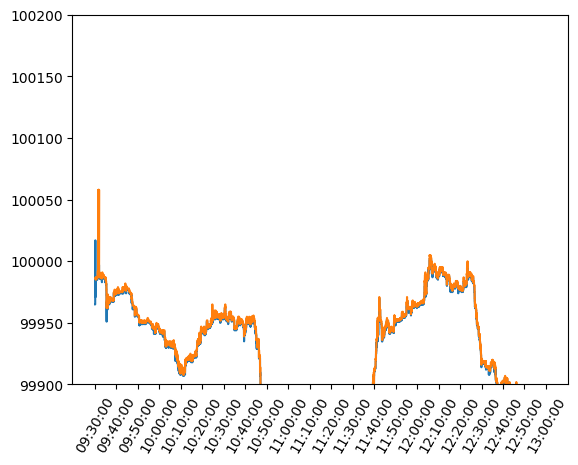

In [51]:
best_bids = pd.DataFrame(L1["best_bids"],columns=["time","price","qty"])
best_asks = pd.DataFrame(L1["best_asks"],columns=["time","price","qty"])

## All times are in ns from 1970, remove the date component to put them in ns from midnight
best_bids["time"] = best_bids["time"].apply( lambda x: x - ns_date(x) )
best_asks["time"] = best_asks["time"].apply( lambda x: x - ns_date(x) )

plt.plot(best_bids.time,best_bids.price)
plt.plot(best_asks.time,best_asks.price)

band = 100
plt.ylim(100_000-band,100_100+band)

time_mesh = np.arange(
    str_to_ns("09:30:00"),
    str_to_ns("13:10:00"),
    1e9*60*10
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

In [ ]:
L2 = order_book.get_L2_snapshots(nlevels=10)

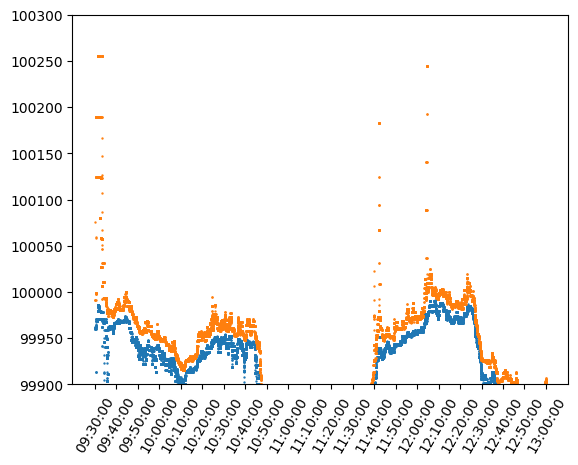

In [52]:
## plotting fifth best bid and fifth best ask
times = [ t - ns_date(t) for t in L2["times"] ]
plt.scatter( times, L2["bids"][:,5,0], s=.5 )
plt.scatter( times, L2["asks"][:,5,0], s=.5 )

band = 100
plt.ylim(100_000-band,100_200+band)

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

In [ ]:
logs_df = parse_logs_df( end_state )

In [ ]:
plt.hist( logs_df[ (logs_df.agent_type == "NoiseAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )


In [ ]:
plt.hist( logs_df[ (logs_df.agent_type == "ValueAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

In [ ]:
plt.hist( logs_df[ (logs_df.agent_type == "MomentumAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

In [ ]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]

In [ ]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
df_start = df.loc[df['EventType'] == 'STARTING_CASH']
df_start = df_start[['agent_id', 'ScalarEventValue']]
df_end = df.loc[df['EventType'] == 'ENDING_CASH']
df_end = df_end[['agent_id', 'ScalarEventValue']]
df = pd.merge(df_start[['agent_id', 'ScalarEventValue']],
                df_end[['agent_id', 'ScalarEventValue']],
                how='left',
                left_on=['agent_id'],
                right_on=['agent_id'],
                suffixes=['_Open',
                         '_Close'])
df['diff'] = df['ScalarEventValue_Open'] - df['ScalarEventValue_Close']

In [ ]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
df = df.loc[df['EventType'] == 'MARKED_TO_MARKET']

In [ ]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
#df = logs_df.loc[logs_df['EventType'] == 'MARKET_FEE']

total_fee = df['fee'].sum()
print(round(total_fee / 100, 2))

In [ ]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
df = df.loc[df['EventType'] == 'ORDER_EXECUTED']

In [ ]:
L2 = order_book.get_L2_snapshots(nlevels=10)

In [ ]:
time_mesh = np.arange(
    str_to_ns("09:30:00"),
    str_to_ns("13:10:00"),
    1e9*60*10
)

## plotting fifth best bid and fifth best ask
times = [ t - ns_date(t) for t in L2["times"] ]
plt.scatter( times, L2["bids"][:,5,0], s=.5 )
plt.scatter( times, L2["asks"][:,5,0], s=.5 )

band = 100
plt.ylim(100_000-band,100_200+band)

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# Plotting Treemap

In [ ]:
# Agent Names
# AdaptivePOVMarketMakerAgent
# MomentumAgent
# NoiseAgent
# ValueAgent
# EXCHANGE_AGENT

df = logs_df[(logs_df.agent_type == "AdaptivePOVMarketMakerAgent")]


In [ ]:
df = logs_df[(logs_df.agent_type == "AdaptivePOVMarketMakerAgent")]

In [ ]:
df_end = logs_df[logs_df['EventType'] == 'ENDING_CASH']

In [ ]:
"""
    Getting all the important data and storing it in df_end
"""


df_end.loc[:, "EndingCashAbsolut"]  = df_end["ScalarEventValue"].apply(lambda x: (((x - 10_000_000) / 100)))
df_end.loc[:, "EndingCashPercentage"]  = df_end["ScalarEventValue"].apply(lambda x: round(((x - 10_000_000) / (10_000_000)), 3) * 100)
df_end.loc[:, "PnL"]  = df_end["ScalarEventValue"].apply(lambda x: "positive" if (x - 10_000_000) > 0 else ("equal" if ((x - 10_000_000) == 0) else "negative"))
df_end.loc[:, "PnLColor"]  = df_end["ScalarEventValue"].apply(lambda x: "#278024" if (x - 10_000_000) > 0 else ("#616161" if ((x - 10_000_000) == 0) else "#cf2d2d"))
df_end = df_end.reset_index()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
# """
# Important: Sorting the dataframe by the size of summed ending cash by agent type
# """

# df_sorted = df_end.groupby('agent_type', sort=False)['ScalarEventValue'].sum().sort_values(ascending=False).reset_index()
# sortedtypes = df_sorted['agent_type'].to_list()

# df_mapping = pd.DataFrame({
#     'agent_type': sortedtypes,
# })

# sort_mapping = df_mapping.reset_index().set_index('agent_type')
# df_end['position'] = df_end['agent_type'].map(sort_mapping['index'])
# df_end.sort_values('position')




# """
# Important: Sort by ending cash but ignoring the order of the agent type
# """

#teteet = df_end.sort_values(by=['position', 'ScalarEventValue'], ascending=[True,False])


In [ ]:
"""
    Source: https://stackoverflow.com/a/67397976
"""

df_sorted = df_end.sort_values(by=['agent_id', 'agent_type'], ascending=[True,True])

df = px.data.tips()
fig = px.treemap(df_sorted, 
        title='Profits and Losses of Agents',
        values='ScalarEventValue',
        path=[px.Constant('Agent Types'), 'agent_type', 'agent_id'],
        )

endingCashPercentage = df_sorted.EndingCashPercentage.tolist()
endingCashAbsolut = df_sorted.EndingCashAbsolut.tolist()
posnegs = df_sorted.PnLColor.tolist()
fig.data[0].customdata = np.column_stack([endingCashAbsolut, endingCashPercentage])
fig.data[0].texttemplate = "AgentID:%{label}<br>%{value}<br>PnL Absolut:%{customdata[0]}$<br>PnL Percent:%{customdata[1]}%"
fig.data[0].marker.colors = posnegs
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

""" 
    Updating the root color of the agent types
"""
y = list(fig.data[0]['marker']['colors'])
for i in range(0, df_end['agent_type'].nunique()):
    y.append("#4f4f4f")
x = tuple(y)
fig.data[0]['marker']['colors'] = x

fig.show()